#Saswata Basu
##20MID0035

##Assignment 2

Task 1: Read the dataset and do data pre-processing <br>
Task 2: Build the ANN model with (input layer, min 3 hidden layers & output layer) <br>
Task 3: Test the model with random data

In [39]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

# Task 1: Read the dataset and perform data preprocessing and visualization


In [41]:
dataset_path = '/content/drive/MyDrive/Externship/drug200.csv'
df = pd.read_csv(dataset_path)

In [42]:
# Explore the dataset
print(df.head())  # Display the first few rows of the dataset
print(df.info())  # Get information about the dataset

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


In [43]:
# Check for missing values
print(df.isnull().sum())  # Count the number of missing values in each column

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


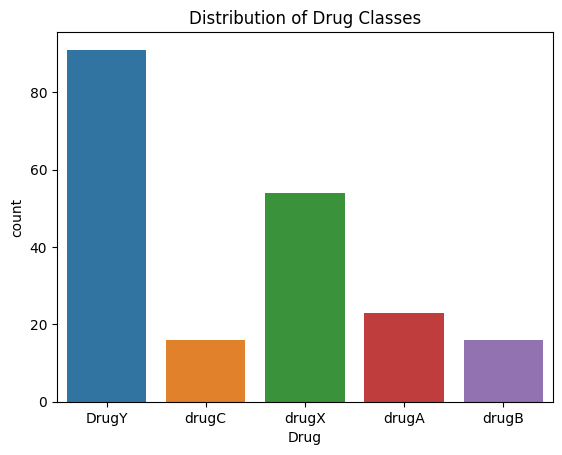

In [44]:
# Visualize the distribution of drug classes
sns.countplot(x='Drug', data=df)
plt.title('Distribution of Drug Classes')
plt.show()

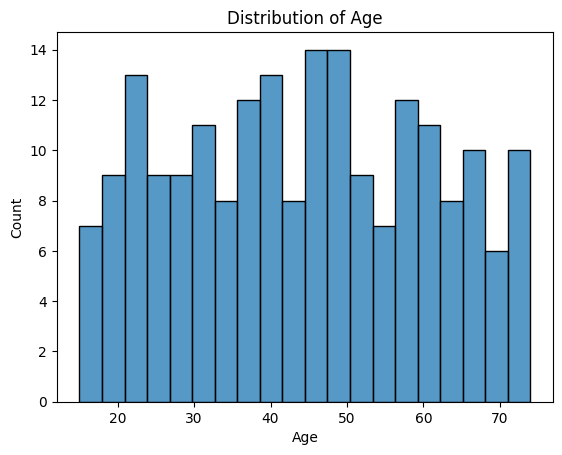

In [45]:
# Visualize the distribution of age
sns.histplot(data=df, x='Age', bins=20)
plt.title('Distribution of Age')
plt.show()

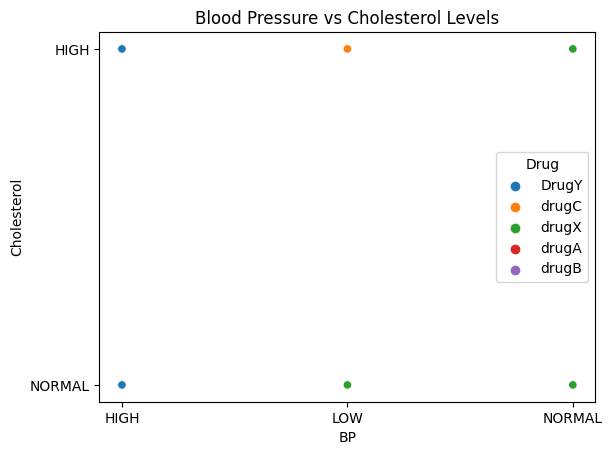

In [46]:
# Visualize the relationship between blood pressure and cholesterol levels
sns.scatterplot(data=df, x='BP', y='Cholesterol', hue='Drug')
plt.title('Blood Pressure vs Cholesterol Levels')
plt.show()

In [47]:
# Perform data preprocessing
categorical_cols = ['Sex', 'BP', 'Cholesterol']
numerical_cols = ['Age', 'Na_to_K']

In [48]:
# Apply one-hot encoding to categorical columns
onehot_encoder = OneHotEncoder(sparse=False)
encoded_categorical = onehot_encoder.fit_transform(df[categorical_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [49]:
# Scale the numerical columns
numerical_data = df[numerical_cols].values
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(numerical_data)

In [50]:
# Concatenate the encoded categorical columns and scaled numerical columns
X = np.concatenate((encoded_categorical, scaled_numerical), axis=1)
y = df['Drug']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Task 2: Build the ANN model

In [51]:
model = Sequential()
model.add(Dense(64, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [52]:
# Print the model summary
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                640       
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 5)                 85        
                                                                 
Total params: 3,333
Trainable params: 3,333
Non-trainable params: 0
_________________________________________________________________
None


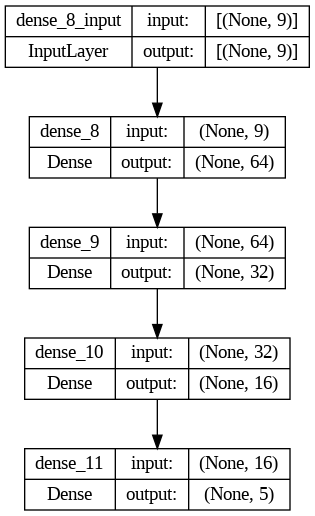

In [53]:
# Plot the model architecture
plot_model(model, to_file='drug_classification_model.png', show_shapes=True, show_layer_names=True)

#Task 3: Test the model with random data

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/25
5/5 [==============================] - 1s 56ms/step - loss: 1.5837 - accuracy: 0.2812 - val_loss: 1.5369 - val_accuracy: 0.3500
Epoch 2/25
5/5 [==============================] - 0s 10ms/step - loss: 1.5334 - accuracy: 0.4688 - val_loss: 1.4897 - val_accuracy: 0.4500
Epoch 3/25
5/5 [==============================] - 0s 14ms/step - loss: 1.4803 - accuracy: 0.6062 - val_loss: 1.4366 - val_accuracy: 0.5250
Epoch 4/25
5/5 [==============================] - 0s 14ms/step - loss: 1.4241 - accuracy: 0.6500 - val_loss: 1.3697 - val_accuracy: 0.6000
Epoch 5/25
5/5 [==============================] - 0s 10ms/step - loss: 1.3536 - accuracy: 0.6938 - val_loss: 1.2941 - val_accuracy: 0.6500
Epoch 6/25
5/5 [==============================] - 0s 16ms/step - loss: 1.2783 - accuracy: 0.7188 - val_loss: 1.2152 - val_accuracy: 0.7000
Epoch 7/25
5/5 [==============================] - 0s 11ms/step - loss: 1.1911 - accuracy: 0.7312 - val_loss: 1.1337 - val_accuracy: 0.7000
Epoch 8/25
5/5 [===========

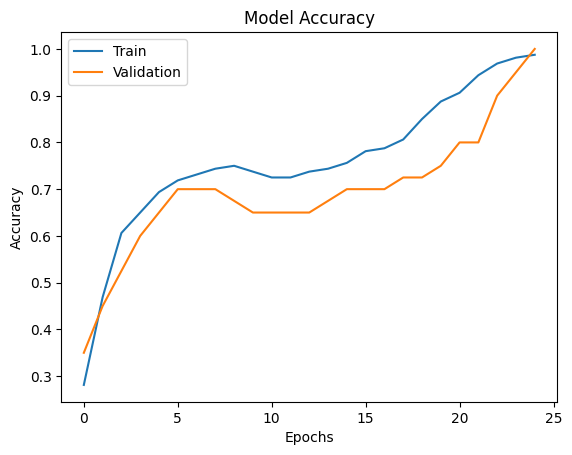

In [56]:
# Plot the accuracy versus epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [57]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

2/2 [==============================] - 0s 14ms/step - loss: 0.2727 - accuracy: 1.0000
Test Loss: 0.2727265954017639
Test Accuracy: 1.0
